In [1]:

import pandas as pd 
import polars as pl
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import json
from typing import List, Tuple

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn import metrics, linear_model

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import average_precision_score, matthews_corrcoef
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
def split_data(df: pd.DataFrame) -> pd.DataFrame:
    features = df[["processId", "parentProcessId", "mountNamespace", "eventId", "argsNum", "returnValue",'System_Core','Amazon_AWS','Container_Virtualization','Maintenance_Package_Management','Security_Monitoring','Utility_Misc']]
    labels = df['sus']
    return features, labels

In [3]:
print(os.getcwd())
relative_path = os.path.abspath(os.path.join(os.getcwd(), "../"))
df = pd.read_csv(relative_path+'/preprocessed_data/non_split_dataset_OHE/total_subset.csv')
# df = df.drop(columns='evil')



a:\Desktop\FYP Final Files\Feature Importance


In [4]:
X,y = split_data(df)

# Random Forest - Feature Importance

In [5]:
# Init the random forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)


In [6]:
# fit model
random_forest_model.fit(X, y)

RandomForestClassifier(random_state=0)

# Feature Importance

Feature Importances:
returnValue: 0.3833284953631251
eventId: 0.2053333954446558
argsNum: 0.11810955638382477
Utility_Misc: 0.0872586744693748
Security_Monitoring: 0.06617237504669156
System_Core: 0.06225275476761983
mountNamespace: 0.04490224435611455
parentProcessId: 0.01941775273833779
Amazon_AWS: 0.0054408992394090324
Maintenance_Package_Management: 0.004947135156636804
processId: 0.0028047418354979026
Container_Virtualization: 3.197519871195758e-05


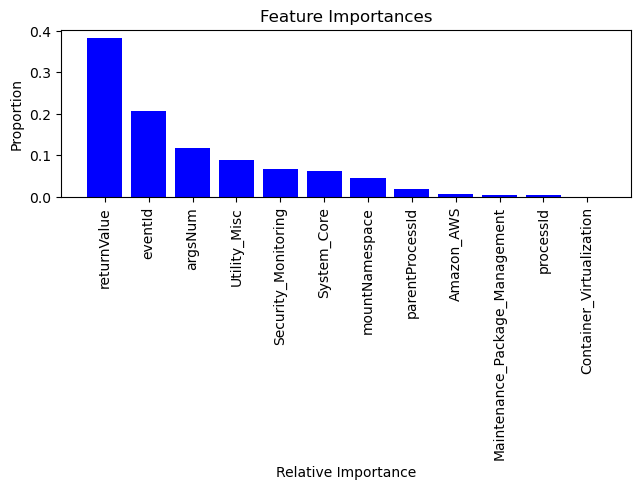

In [7]:
# Feature importance
feature_importances = random_forest_model.feature_importances_

# Sort the importance and display in order
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

# For visualisation
plt.title('Feature Importances')
plt.bar(range(len(sorted_indices)), feature_importances[sorted_indices], color='b', align='center')
plt.xticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices], rotation=90)
plt.tight_layout()
plt.xlabel('Relative Importance')
plt.ylabel('Proportion')
plt.show()

In [8]:
feature_importances

array([2.80474184e-03, 1.94177527e-02, 4.49022444e-02, 2.05333395e-01,
       1.18109556e-01, 3.83328495e-01, 6.22527548e-02, 5.44089924e-03,
       3.19751987e-05, 4.94713516e-03, 6.61723750e-02, 8.72586745e-02])